# Shipper Analysis

## Analisis Keterlambatan Pengiriman

Dalam memberikan pelayanan kepada konsumen, keandalan menjadi salah satu fokus perusahaan untuk memuaskan konsumen. Keandalan yang diberikan oleh perusahaan yaitu berupa ketepatan waktu pengiriman. Untuk memenuhi keinginan pelanggan di bisnis logistik maka perlu dilakukan pemilihan vendor pengiriman terbaik untuk dapat memuaskan pelanggan. Analisis Keterlambatan Pengiriman pada perusahaan Nothwind dilakukan dengan membandingkan frekuensi dan durasi keterlambatan yang dilakukan oleh vendor United Package, Speedy Express, dan Federal Shipping.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

Dataset diperoleh dari hasil querry pada database Northwind sebagai berikut.

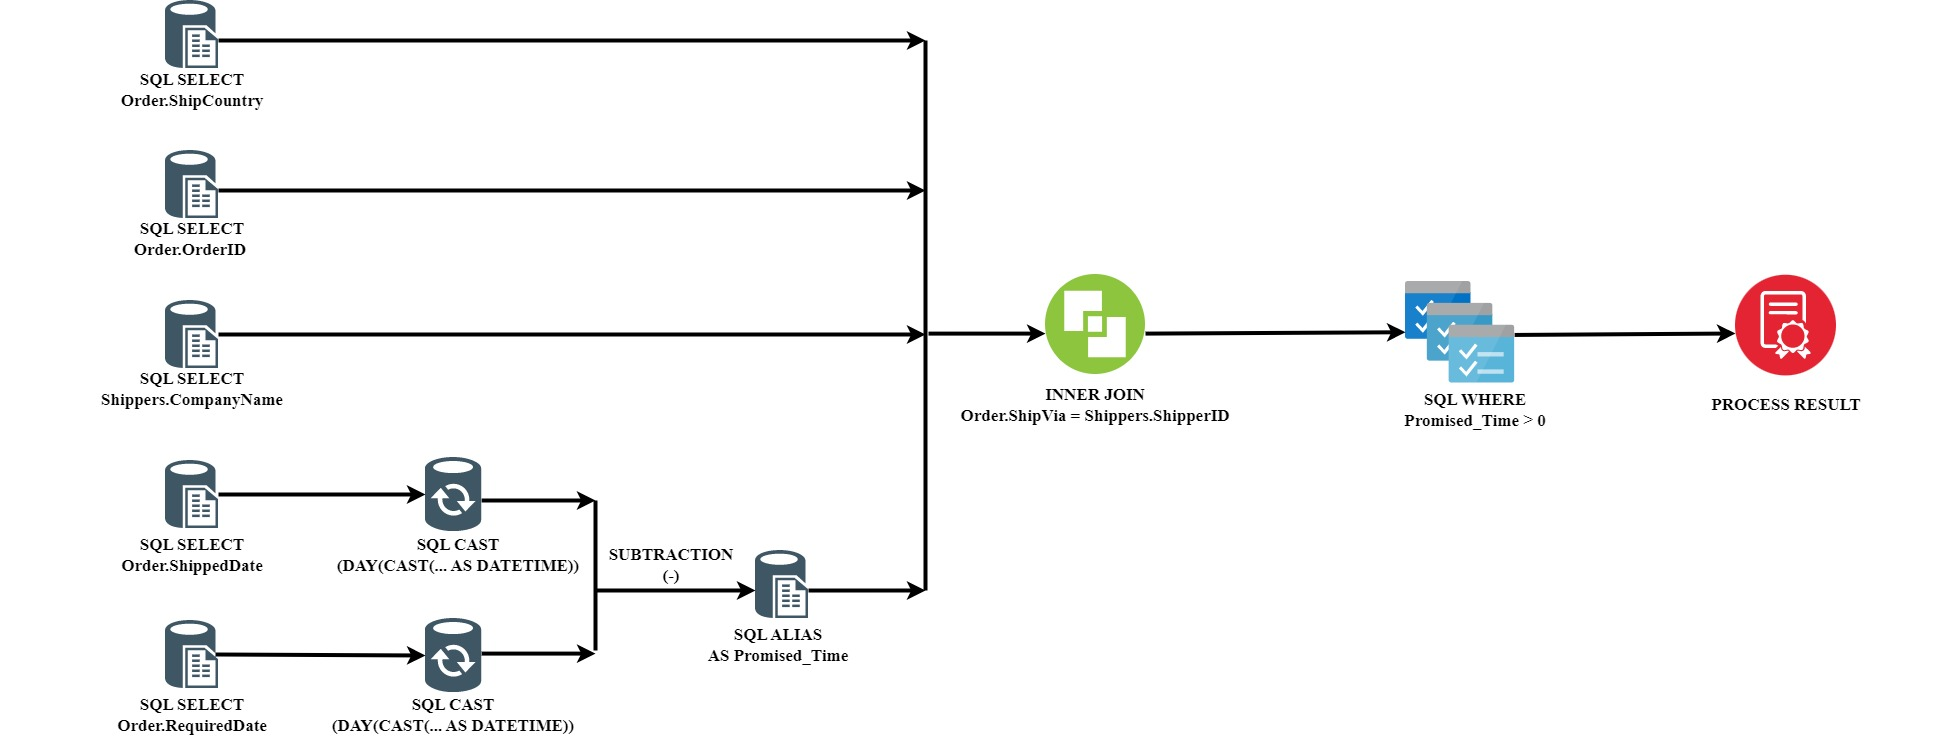

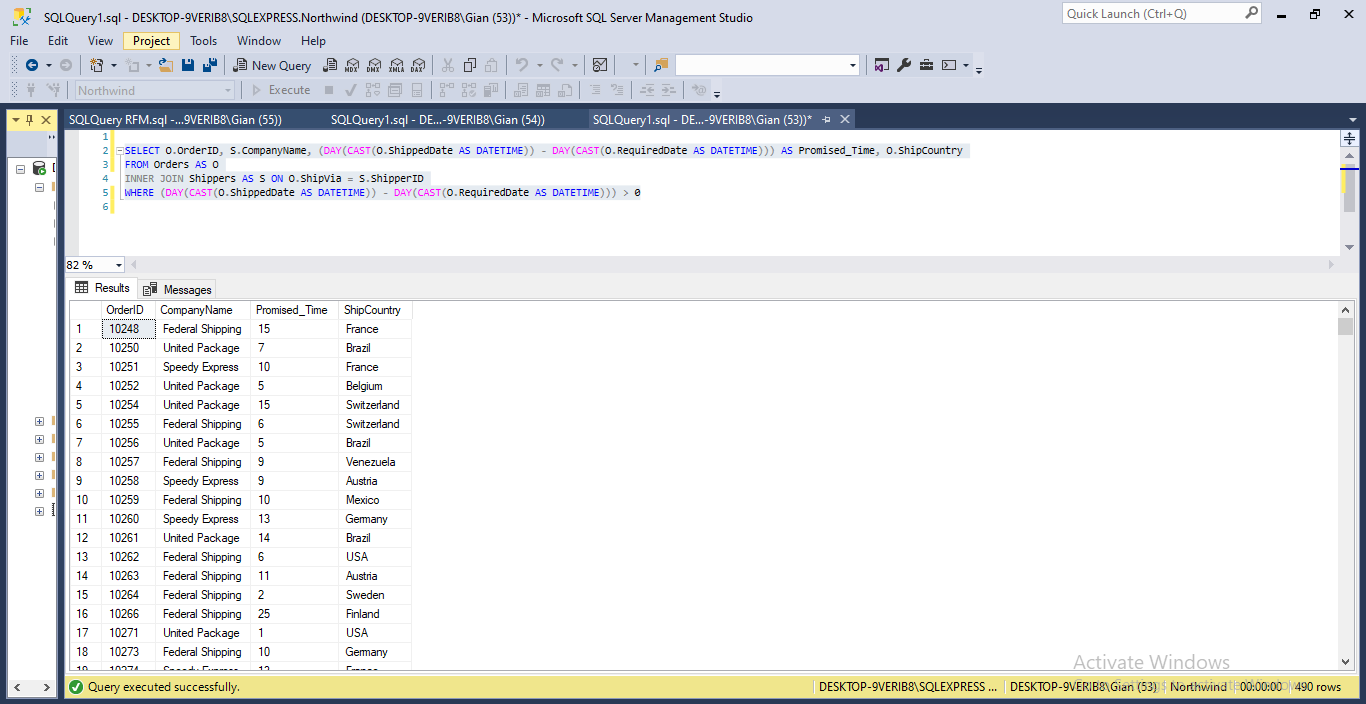

In [2]:
df = pd.read_csv("Late Shipments Table.csv",encoding="latin-1", sep=';')
df

,OrderID,CompanyName,Promised_Time,ShipCountry
0,10248,Federal Shipping,15,France
1,10250,United Package,7,Brazil
2,10251,Speedy Express,10,France
3,10252,United Package,5,Belgium
4,10254,United Package,15,Switzerland
...,...,...,...,...
485,11043,United Package,9,France
486,11046,United Package,3,Germany
487,11048,Federal Shipping,8,Canada
488,11053,United Package,4,Austria


## Visualisasi Late Shipments

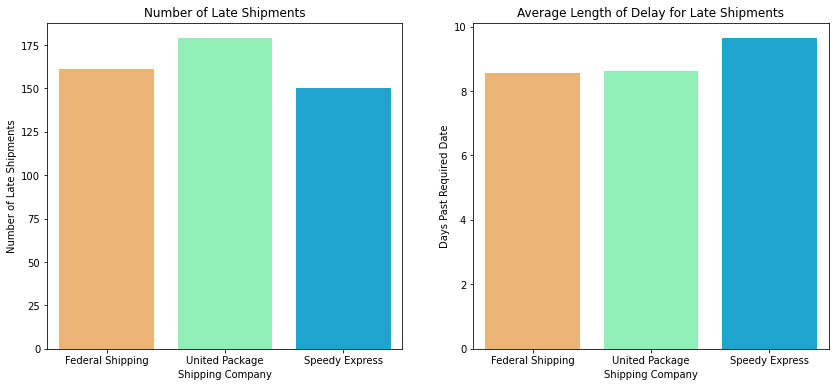

In [3]:
fig, axes = plt.subplots(1,2, figsize=[14,6])

sns.barplot(x='CompanyName', y='Promised_Time', data=df, ci=0, ax=axes[1], palette='rainbow_r')
axes[1].set_title('Average Length of Delay for Late Shipments')
axes[1].set_xticks(np.arange(3))
axes[1].set_ylabel('Days Past Required Date')
axes[1].set_xlabel('Shipping Company')

sns.countplot(x= 'CompanyName', data=df, ax=axes[0], palette='rainbow_r')
axes[0].set_title('Number of Late Shipments')
axes[0].set_xticks(np.arange(3))
axes[0].set_ylabel('Number of Late Shipments')
axes[0].set_xlabel('Shipping Company')
plt.show()

In [4]:
df_agg = df.groupby('ShipCountry').agg({'Promised_Time': 'count'})
df_agg.sort_values(by=['Promised_Time'], ascending=False)

,Promised_Time
ShipCountry,
Germany,74
USA,70
France,51
Brazil,40
UK,31
Venezuela,24
Sweden,24
Austria,22
Italy,20


''

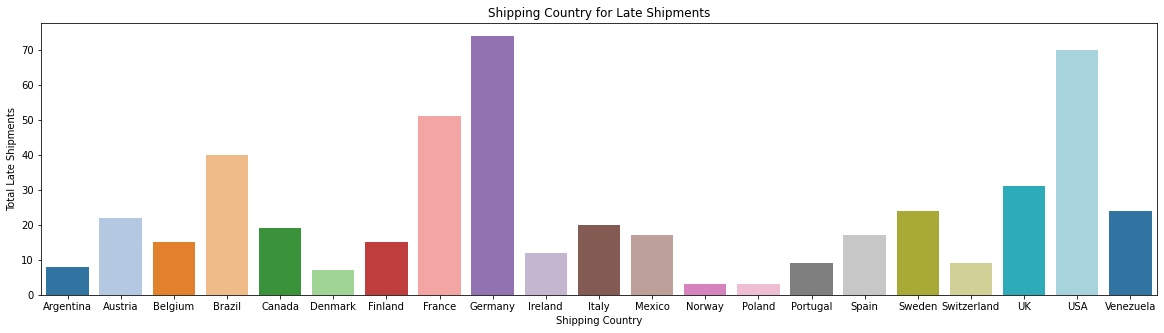

In [12]:
plt.figure(figsize=(20,5))

sns.barplot(x=df_agg.index, y='Promised_Time', data=df_agg, palette='tab20')
plt.title('Shipping Country for Late Shipments')
plt.ylabel('Total Late Shipments')
plt.xlabel('Shipping Country')
;


## Kesimpulan

1. United package menjadi jasa pengiriman yang paling sering mengalami keterlambatan dalam pengiriman yaitu sebanyak > 175 kali.
2. Speedy Express menjadi jasa pengiriman dengan rataan durasi keterlambatan pengiriman terlama yaitu > 9 hari
3. Federal Shipping menempatsi posisi di tengah-tengah untuk kategori frekuensi keterlambatan pengiriman dan durasi keterlambatan
4. Germany, USA, dan France menjadi destinasi negara dengan keterlambatan pengiriman terbanyak


## Rekomendasi

Untuk pengiriman dengan total order yang tinggi seperti Germany, USA, dan France agar diberikan pelayanan pengiriman terbaik. **Federal Shipping** menjadi pilihan utama untuk pengiriman terbaik karena frekuensi dan durasi keterlambatan yang lebih baik dari United package dan Speedy Express